# Predicting Diabetes

## Import Libraries

In [1]:
import pandas as pd # pandas is a dataframe library
import matplotlib.pyplot as plt # matplotlib.pyplot plots data
import numpy as np # numpy provides N-dimensional object support

# do ploting inline instead of in a separate window
%matplotlib inline

## Load and review data

In [3]:
df = pd.read_csv("pima-data.csv") # load Pima data

In [4]:
df.shape # check the structure of the data by using the shape function (number of columns, number of rows)

(768, 10)

In [5]:
df.head(5) # inspect the first 5 rows of the loaded dataframe with head() function

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [6]:
df.tail(5) # inspect the last 5 rows of the loaded dataframe with tail() function

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


### Definition of features

From the metadata on the data source we have the following definition of the features.

| Feature    | Description  | Comments  |
|----------------|--------------|----------|
| num_preg       | number of pregnancies         |
| glucose_conc   | Plasma glucose concentration @ 2 hours in an oral glucose tolerance test           |
| diastolic_bp   | Diastolic blood pressure (mm Hg)  |
| thickness  | Triceps skin fold thickness (mm) |
| insulin  | 2-Hour serum insulin (mu U/ml)  |
| bmi | Boddy mass index (weight in kg/(height in m)^2  |
| diab_pred  | Diabetes pedigree function  |
| Age (years)  | Age (years) |
| skin | ???? | What is this? |
| diabetes | Class variable (1=True, 0=Fales) | Why is our data boolean (True/False)? |

## Check for null values

In [7]:
df.isnull().values.any() # The isnull() method will check each value on the datafrome for null values, The any() method will return true if any nulls were found 

False

In [10]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    
    Input:
        df: pandas DataFrame
        size: vertical and horizaontal size of the plot
        
    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """
    
    corr = df.corr() # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr) # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns) # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) # draw y tick marks

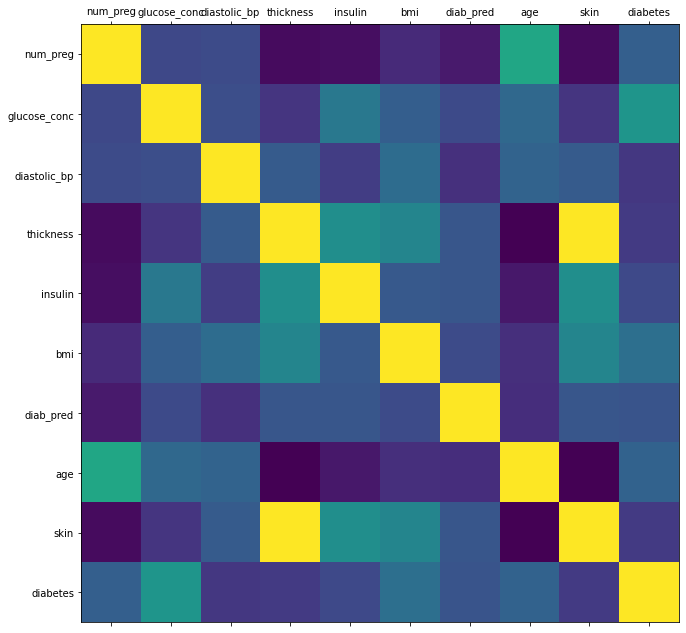

In [11]:
plot_corr(df) # invoke the correlation cross plot

In [12]:
df.corr() # check the correlation numbers to verify the results shown in the graph

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [14]:
# The skin column was created by converting the thickness, which was in millimeters to inches
df.head() # look at the head of the data frame, first few rows

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [16]:
del df['skin'] # Use the del command to delete the skin column (extraneous correlated column)

In [17]:
df.head() # Verify the skin column was dropped by checking the head again

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


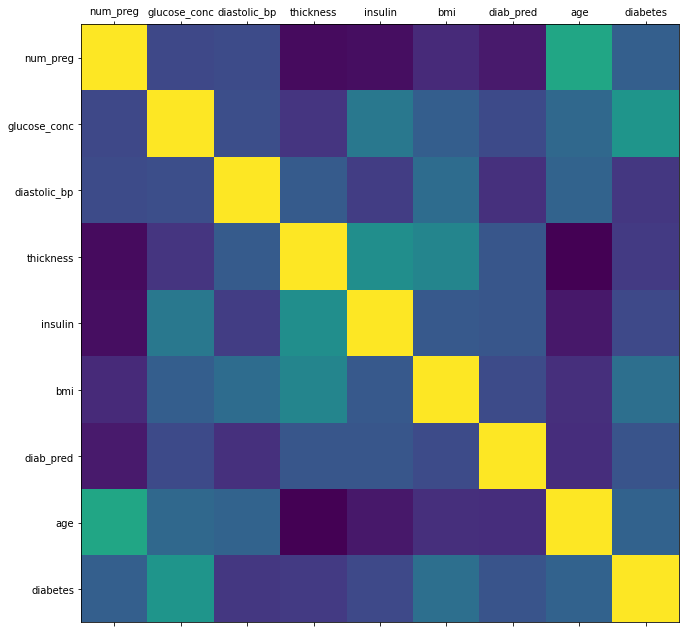

In [18]:
plot_corr(df) # Take another look at the plot to verify that there are no other correlated columns

## Check Data Types

In [19]:
df.head(5) # Check the first 5 rows in the dataframe

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


Change True to 1, False to 0

In [20]:
diabetes_map = {True: 1, False: 0} # We need to define a mapping dictionary that defines True is 1 and False is 0

In [21]:
df['diabetes'] = df['diabetes'].map(diabetes_map) # Then we use the map method to change the values from True and False to 1 and 0.

In [22]:
df.head(5) # Check the first 5 rows in the dataframe, we see now that the diabetes class is all 1s and 0s

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Check true/false ratio

In [24]:
num_true = len(df.loc[df['diabetes'] == True]) # check how many times diabetes is true/1
num_false = len(df.loc[df['diabetes'] == False]) # check how many times diabetes is false/0
print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num true/ (num_true + num_false)) * 100) # calculate the percentage of the time that the diabetes class is true
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100)) # calculate the percentage of the time that the diabetes class is false

SyntaxError: invalid syntax (1709393340.py, line 3)